# Digit Recognizer Kaggle Challenge using the MNIST Dataset
### https://www.kaggle.com/c/digit-recognizer/overview

### Made with the help of 
### https://www.kaggle.com/abhinand05/mnist-introduction-to-computervision-with-pytorch
### and 
### https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook

## Importing Libraries 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import torch
from torch.autograd import Variable
from torch import nn,optim
import torch.nn.functional as F
from torch.autograd import Variable
import warnings 
warnings.filterwarnings('ignore')
#from torchvision import transforms, models
from sklearn.model_selection import train_test_split

## Importing Dataset

In [4]:
train = pd.read_csv('train.csv',dtype = np.float32)
test = pd.read_csv('test.csv',dtype = np.float32)
sub = pd.read_csv('sample_submission.csv')

In [5]:
target = train.label.values

In [6]:
features = train.loc[:,train.columns != 'label'].values/255 #Scaling the features
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [11]:
# numpy to torch conversion
X_Train = torch.from_numpy(X_train)
Y_Train = torch.from_numpy(Y_train).type(torch.LongTensor)

X_Test = torch.from_numpy(X_test)
Y_Test = torch.from_numpy(Y_test).type(torch.LongTensor)


In [12]:
# Set our torch train + test

train = torch.utils.data.TensorDataset(X_Train, Y_Train)
test = torch.utils.data.TensorDataset(X_Test, Y_Test)

In [13]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(train) / batch_size)
num_epochs = int(num_epochs)

In [14]:
# Set our data loaders
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

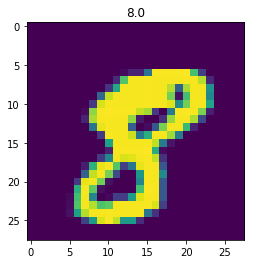

In [15]:
plt.imshow(features[10].reshape(28,28))
plt.axis("ON")
plt.title(str(target[10]))
plt.savefig('graph.png')
plt.show()

## Logistic Regression

In [16]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
       
    def forward(self, x):
        out = self.linear(x)
        return out

In [17]:
input_dim = 28*28 
output_dim = 10  

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# Training the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(train)
        
        loss = error(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.4993867576122284  Accuracy: 85.95237731933594%
Iteration: 1000  Loss: 0.5159269571304321  Accuracy: 86.0952377319336%
Iteration: 1500  Loss: 0.5932170748710632  Accuracy: 86.21428680419922%
Iteration: 2000  Loss: 0.7193505167961121  Accuracy: 86.28571319580078%
Iteration: 2500  Loss: 0.6261521577835083  Accuracy: 86.3452377319336%
Iteration: 3000  Loss: 0.45912283658981323  Accuracy: 86.48809814453125%
Iteration: 3500  Loss: 0.6129841208457947  Accuracy: 86.57142639160156%
Iteration: 4000  Loss: 0.5174145102500916  Accuracy: 86.69047546386719%
Iteration: 4500  Loss: 0.5987500548362732  Accuracy: 86.79762268066406%
Iteration: 5000  Loss: 0.5823884010314941  Accuracy: 86.86904907226562%
Iteration: 5500  Loss: 0.6803264021873474  Accuracy: 86.97618865966797%
Iteration: 6000  Loss: 0.5666166543960571  Accuracy: 87.02381134033203%
Iteration: 6500  Loss: 0.6059433221817017  Accuracy: 87.11904907226562%
Iteration: 7000  Loss: 0.4729689061641693  Accuracy: 87.1904754638

###  We can see that the accuracy comes of comes out to be pretty low by using Standard Logistic Regression

# CNN Model 

In [54]:
train = pd.read_csv("train.csv", dtype=np.float32)
final_test = pd.read_csv("test.csv", dtype=np.float32)
sample_sub = pd.read_csv("sample_submission.csv")
train.label.head()


0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float32

In [55]:
targets_np = train.label.values
features_np = train.loc[:, train.columns != 'label'].values/255

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features_np, targets_np, test_size=0.2, random_state=42)

In [56]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(target_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(target_test).type(torch.LongTensor) # data type is long

In [57]:
batch_size = 256

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

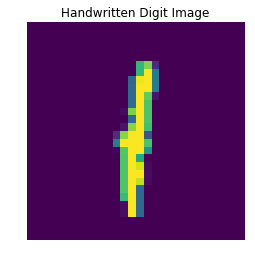

In [58]:
def visualize_image(data, index, pred=False, val=0):
    '''This funtion can be used to visualize the images'''
    plt.imshow(data[index].reshape(28,28))
    plt.axis("off")
    plt.title("Handwritten Digit Image")
    plt.show()
visualize_image(features_np, 12)

In [59]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 Hidden Layer Network
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 probbability
        self.dropout = nn.Dropout(p=0.2)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax
        
    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        
        x = self.log_softmax(self.fc5(x), dim=1)
        
        return x

In [60]:
model = Classifier()
# Define our loss function
criterion = nn.NLLLoss()
# Define the optimier
optimizer = optim.Adam(model.parameters(), lr=0.0015)

epochs = 25
steps = 0
print_every = 50
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        steps += 1
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0

            # Turn off gradients for validation
            with torch.no_grad():
                model.eval()
                for images, labels in test_loader:
                    log_ps = model(images)
                    test_loss += criterion(log_ps, labels)

                    ps = torch.exp(log_ps)
                    # Get our top predictions
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

            model.train()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_losses[-1]),
                  "Test Loss: {:.3f}.. ".format(test_losses[-1]),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/25..  Training Loss: 0.412..  Test Loss: 0.422..  Test Accuracy: 0.872
Epoch: 1/25..  Training Loss: 0.568..  Test Loss: 0.287..  Test Accuracy: 0.917
Epoch: 2/25..  Training Loss: 0.037..  Test Loss: 0.212..  Test Accuracy: 0.936
Epoch: 2/25..  Training Loss: 0.123..  Test Loss: 0.189..  Test Accuracy: 0.945
Epoch: 2/25..  Training Loss: 0.200..  Test Loss: 0.173..  Test Accuracy: 0.947
Epoch: 3/25..  Training Loss: 0.043..  Test Loss: 0.155..  Test Accuracy: 0.953
Epoch: 3/25..  Training Loss: 0.103..  Test Loss: 0.132..  Test Accuracy: 0.960
Epoch: 4/25..  Training Loss: 0.004..  Test Loss: 0.155..  Test Accuracy: 0.956
Epoch: 4/25..  Training Loss: 0.052..  Test Loss: 0.118..  Test Accuracy: 0.965
Epoch: 4/25..  Training Loss: 0.094..  Test Loss: 0.120..  Test Accuracy: 0.966
Epoch: 5/25..  Training Loss: 0.017..  Test Loss: 0.125..  Test Accuracy: 0.964
Epoch: 5/25..  Training Loss: 0.055..  Test Loss: 0.112..  Test Accuracy: 0.968
Epoch: 5/25..  Training Loss: 0.090..  T

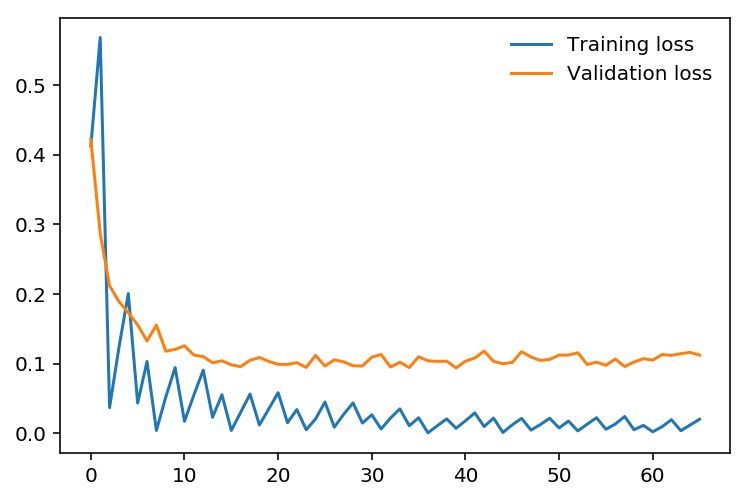

In [61]:
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [62]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [63]:
%matplotlib inline
def make_prediction(data):
    images, labels = next(iter(data))

    img = images[42].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    view_classify(img.view(1, 28, 28), ps)

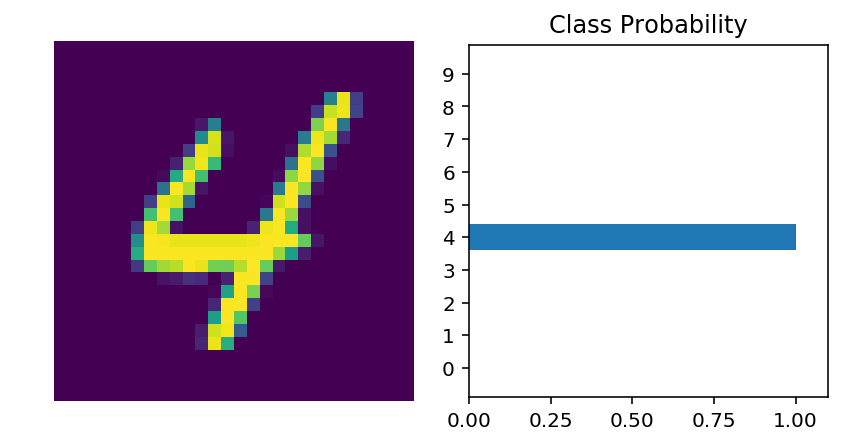

In [64]:
final_test_np = final_test.values/255
test_tn = torch.from_numpy(final_test_np)

fake_labels = np.zeros(final_test_np.shape)
fake_labels = torch.from_numpy(fake_labels)

submission_tn_data = torch.utils.data.TensorDataset(test_tn, fake_labels)

submission_loader = torch.utils.data.DataLoader(submission_tn_data, batch_size = batch_size, shuffle = False)
make_prediction(submission_loader)


In [65]:
submission = [['ImageId', 'Label']]

# Turn off gradients for validation
with torch.no_grad():
    model.eval()
    image_id = 1
    for images, _ in submission_loader:
        log_ps = model(images)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        
        for prediction in top_class:
            submission.append([image_id, prediction.item()])
            image_id += 1

In [66]:
submission_df = pd.DataFrame(submission)
submission_df.columns = submission_df.iloc[0]
submission_df = submission_df.drop(0, axis=0)

In [67]:
submission_df.to_csv("submission.csv", index=False)
